In [1]:
include("simple_sn.jl")
using Main.SNetwork

In [2]:
using Statistics, PyPlot

In [3]:
using RDatasets

In [4]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [5]:
normalize(x) = x ./ maximum(x)
rates = cat(normalize(iris.SepalLength), normalize(iris.SepalWidth), normalize(iris.PetalLength), normalize(iris.PetalWidth), dims=2)

species = unique(iris.Species)
teach_rates = 1.0 .* cat(iris.Species .== species[1], iris.Species .== species[2], iris.Species .== species[3], dims=2);

In [6]:
ninputs = size(rates,2)

4

In [7]:
nhidden = 30

30

In [8]:
noutputs = size(teach_rates,2)

3

In [26]:
iris_net = Network([ninputs, nhidden, noutputs], 0.0, 1.0, 5)

Network(Dict(4 => [0; 0; 0],2 => [0; 0; … ; 0; 0],3 => [0; 0; 0],1 => [0; 0; 0; 0]), Dict(2 => [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],3 => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0],1 => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]), Dict{Int64,Array{#s1,2} where #s1<:Real}(2 => [0.0; 0.0; … ; 0.0; 0.0],3 => [0.0; 0.0; 0.0],1 => [-1.0; -1.0; -1.0; -1.0]), Dict{Tuple{Int64,Int64},Array{#s2,2} where #s2<:Real}((1, 2) => [-1.3473524005204112 -0.15443165793530272 … -0.6788528732174642 -0.011470161659069509; -0.3059180879198434 -0.7738007555861032 … -0.1346593195974768 -0.07345575937276731; 0.5388025143212405 0.056475174725071416 … 1.6274093798580131 0.9003937082698935; 1.8300873628770582 -0.028632322045987323 … 0.7310433517700431 -0.9367546646361333],(2, 3) => [-0.8574659724757614 -0.5407707145088281 1.7229698182306359; 1.3575426816872624 0.6607163323512899 -1.5219210137039296; … ; 0.695599106538542 -0.49528702937966235 -0.7520929958581166; 0.23029478128761663 -0.024742706547930357 0.9929

In [27]:
iris_net.thresholds[2] = 0.9
iris_net.thresholds[3] = 0.025 * nhidden

0.75

In [28]:
iris_net.learn_rate = 0.001

0.001

In [29]:
(l, a) = @time train_k_fold(iris_net, rates, teach_rates, 50, 500, 5)

 35.348105 seconds (227.64 M allocations: 40.999 GiB, 14.29% gc time)


([2.957511467729181, 2.9246042873968703, 1.4710407262010392, 4.879261917793225, 0.851231850200145, 2.2309332054111906, 0.7367357403661348, 1.9574078312700127, 7.985429533473016, 0.6402750080582292  …  0.0157672605135398, 0.046213815123334764, 0.11731229628900287, 0.10538060558393736, 0.0508404458304831, 0.030099455324434532, 0.029551352344382505, 0.04480511766593388, 0.002295700290866535, 0.0245056298015155], [1.0, 0.6666666666666666, 0.2, 0.03333333333333333, 0.0, 1.0, 0.7666666666666667, 0.3333333333333333, 0.26666666666666666, 0.0  …  1.0, 0.9, 0.9666666666666667, 0.8, 0.7666666666666667, 1.0, 0.8666666666666667, 1.0, 0.5, 0.2])

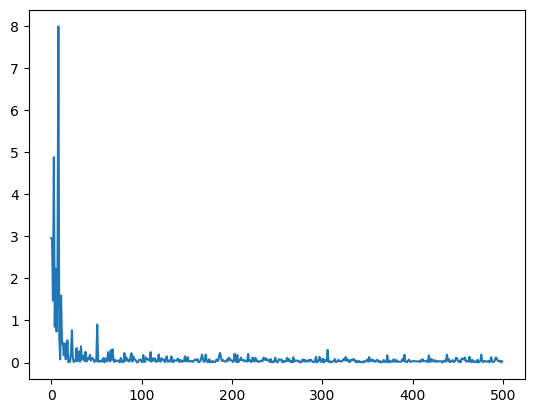

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc120363c8>

In [30]:
plot(l)

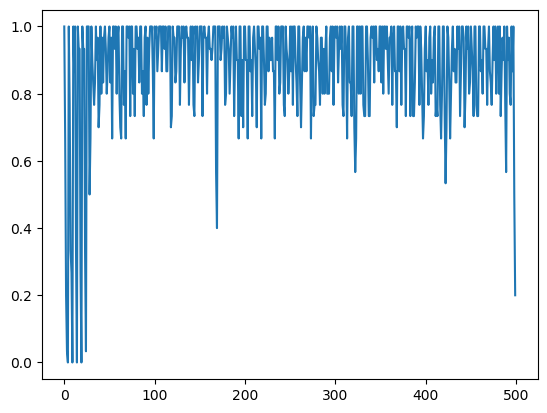

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc11fa0518>

In [31]:
plot(a)

In [32]:
fr = test(iris_net, rates, 1000)

150×3 Array{Float64,2}:
 0.12   0.045  0.002
 0.11   0.041  0.0  
 0.136  0.027  0.0  
 0.093  0.049  0.002
 0.14   0.038  0.0  
 0.137  0.054  0.0  
 0.122  0.037  0.0  
 0.112  0.057  0.0  
 0.115  0.046  0.0  
 0.127  0.043  0.0  
 0.147  0.038  0.001
 0.127  0.045  0.0  
 0.121  0.042  0.0  
 ⋮                  
 0.0    0.108  0.1  
 0.001  0.122  0.111
 0.0    0.124  0.125
 0.004  0.118  0.11 
 0.0    0.11   0.092
 0.0    0.112  0.115
 0.001  0.13   0.124
 0.002  0.117  0.108
 0.0    0.108  0.106
 0.001  0.115  0.117
 0.001  0.12   0.128
 0.0    0.107  0.111

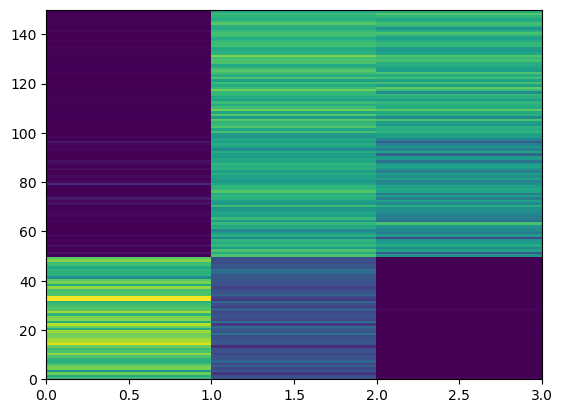

PyObject <matplotlib.collections.PolyCollection object at 0x7fdc11f7c5f8>

In [33]:
pcolor(fr)

In [34]:
accuracy(fr, teach_rates)

0.7333333333333333